In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the data year 2020
df = pd.read_csv('survey_results_public.csv')
df.head(1)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27


Because we'll be using the salary (converted compensation) column, we are gonna drop nan values from this column

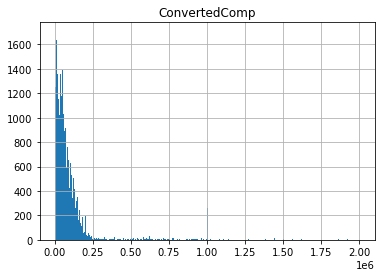

In [3]:
hist = df.hist(column="ConvertedComp", bins=500)

In the histogram we can see that most of respondent devs have salaries inside the range of 0 - 300000$
So, let's filter the respondents to get rid of outliers

In [4]:
df_salary = df.dropna(subset=['ConvertedComp']).reset_index(drop=True)
df_salary.head(1)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13


In [5]:
# because we're gonna work with annual salaries, let's filter salaries inside the range of 2000 < salary < 300000
# to get rid of outliers
len(df[df['ConvertedComp'] > 300000]) , len(df[df['ConvertedComp'] < 2000]), len(df.dropna(subset=['ConvertedComp']))

(1620, 567, 34756)

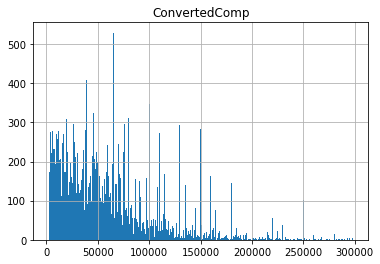

In [6]:
df_salary = df_salary[df_salary['ConvertedComp'] < 300000]
df_salary = df_salary[df_salary['ConvertedComp'] > 2000]
df_salary = df_salary.reset_index(drop=True)

hist = df_salary.hist(column="ConvertedComp", bins=500)

In [7]:
# Here we get a list of the programming languages in the survey

def prog_languages():
    prog_languages = []
    for languages in df_salary['LanguageWorkedWith']:
        for language in str(languages).split(";"):
            if language not in prog_languages:
                prog_languages.append(language)
    return prog_languages
            
prog_languages = prog_languages()
prog_languages[0:5]

['Python', 'SQL', 'HTML/CSS', 'Java', 'JavaScript']

# Most popular languages in the labour market in history

In [8]:
# here we create a function to count how many devs have worked with each programming language, then we'll be 
# using this function in the function of the next cell

def count_col(language):
    # we create an empty list and then we can count how many devs worked with each language
    count_col = 0
    for languages in list(df_salary['LanguageWorkedWith']):
        if language in str(languages):
            count_col += 1
    return count_col

In [9]:
# here we use the count_col(language) function to create a pandas df of how many devs of the survey have worked with
# each programming language

def count_lang():
    # we create an empty dictionary to count how many devs have worked with each programming language using 
    # the function count_col(language) that we created in the previous cell iterating through every 
    # programming language
    count_lang = dict()
    for language in prog_languages:
        count_lang[language] = count_col(language)
    
    # creating the dataframe from the dictionary count_lang
    df_count_lang = pd.DataFrame.from_dict(count_lang, orient='index', 
                               columns=['Number of developers']
                                      ).sort_values(by='Number of developers', 
                                                    ascending=False)
    df_count_lang = df_count_lang.drop(['nan'], axis=0)
    
    return df_count_lang

df_count_lang = count_lang()

In [10]:
df_count_lang.head(3)

,Number of developers
Java,25397
C,25199
JavaScript,22207


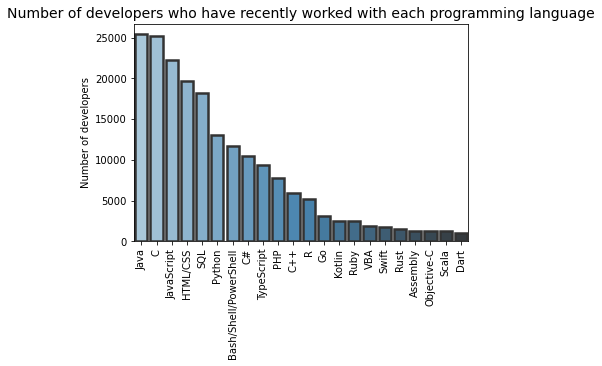

In [11]:
import seaborn as sns
import matplotlib.pylab as plt

ax2 = sns.barplot(x=df_count_lang.head(22).index, y="Number of developers", 
                 data=df_count_lang.head(22), palette="Blues_d",  
                 edgecolor=".2", linewidth=2.5)
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style("whitegrid")
ax2.set_title('Number of developers who have recently worked with each programming language', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

# Salary by programming language

In [12]:
# here we get a dictionary with all the salaries of each developer who knows a programming language

def sal_by_language():    
    # we create an empty dictionary to register all the salaries of each dev who worked with each 
    # programming language, the keys of this dictionary are each programming language and the values 
    # are lists of each dev salary (list_sal) 
    dict_sal = dict()
    for language in prog_languages:
        list_sal = []
        for i in range(df_salary.shape[0]):
            if language in str(df_salary['LanguageWorkedWith'][i]):
                list_sal.append(df_salary['ConvertedComp'][i])
        dict_sal[language] = list_sal
    return dict_sal

dict_sal = sal_by_language()

In [13]:
# here, we get a pandas df with the mean salary of the developers who have worked with each programming 
# language

def mean_sal_by_language():
    # we created empty dictionaries to register the mean, standard error, standard deviation, and the number
    # of devs (pop) of each programming language
    dict_mean_sal = dict()
    dict_err_sal = dict()
    dict_std_sal = dict()
    dict_pop_sal = dict()
    
    for language in prog_languages:
        dict_mean_sal[language] = np.mean(dict_sal[language])
        dict_err_sal[language] = np.std(dict_sal[language])/(np.sqrt(len(dict_sal[language])))
        dict_std_sal[language] = np.std(dict_sal[language])
        dict_pop_sal[language] = len(dict_sal[language])
        
    # then, we use the dictionaries to create dataframes
        
    df_mean_salary = pd.DataFrame.from_dict(dict_mean_sal, orient='index', columns=['Mean_salary_($)'])
    
    df_err_salary = pd.DataFrame.from_dict(dict_err_sal, orient='index', columns=['std_err'])
    
    df_std_salary = pd.DataFrame.from_dict(dict_std_sal, orient='index', columns=['std'])
    
    df_pop_salary = pd.DataFrame.from_dict(dict_pop_sal, orient='index', columns=['Population'])
    
    # and here we join all the dataframes created in the funtion into one dataframe containing all the 
    # statistical values we compute
    
    df_mean_err_salary = df_mean_salary.join(df_err_salary).join(df_std_salary).join(df_pop_salary)
    
    return df_mean_err_salary

In [14]:
# here we sort the dataframe by mean salary
df_mean_salary = mean_sal_by_language().sort_values(by='Mean_salary_($)', ascending=False)

In [15]:
df_mean_salary.head()

,Mean_salary_($),std_err,std,Population
Scala,86076.112687,1643.093523,58531.963715,1269
Perl,84128.581109,1789.038785,55834.063253,974
Rust,82509.600000,1450.652351,55901.900526,1485
Go,82181.394394,1039.210848,57561.400129,3068
Ruby,78613.346543,1097.231276,54564.507122,2473


Here we get the salaries of the developers who know each programming language, it's important to note that the developers in the survey can know one or more than one programming language

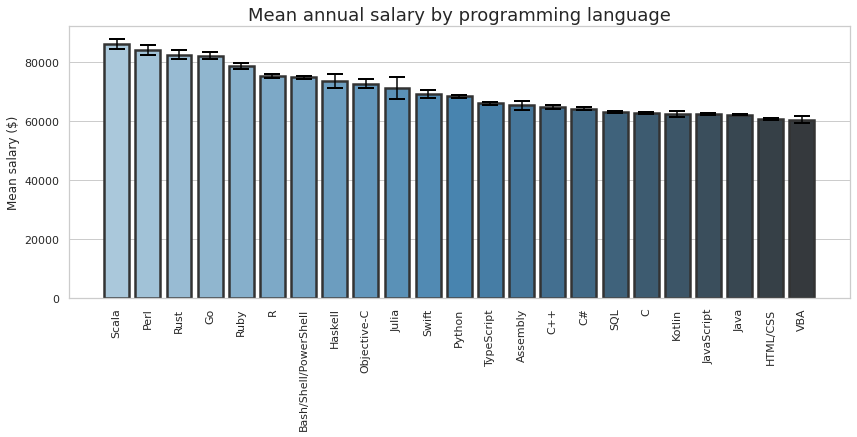

In [16]:
# and then we plot

import seaborn as sns
import matplotlib.pylab as plt

ax = sns.barplot(x=df_mean_salary.index[0:23], y=df_mean_salary['Mean_salary_($)'][0:23],
                 data=df_mean_salary.head(23), palette="Blues_d",  
                 edgecolor=".2", linewidth=2.5)

sns.set(rc={'figure.figsize':(16,5)})

sns.set_style("whitegrid")

plt.errorbar(x=df_mean_salary.index[0:23], 
             y=df_mean_salary['Mean_salary_($)'][0:23],
             yerr=df_mean_salary['std_err'][0:23], capsize=8, capthick=2, ls='none', ecolor='black')

plt.ylabel('Mean salary ($)')

ax.set_title('Mean annual salary by programming language', fontsize=18)

ax.tick_params(axis='x', rotation=90)

# Can we say that the developers who have some python experience earn more than other developers?

In order to answer this question, we'll use hypothesis testing with significancy alpha = 0.05, so Zc = 1.65. Then, all z values over 1.65 means that python salaries are higher

    *Python --> n = 13009, x = 68369, s = 52732

In [17]:
def test_hypo(language='Python'):
    # here we create an empty dictionary to register all the z values of each programming language compared to
    # python mean salaries
    dict_z = dict()
    
    for other_lang in prog_languages:
        
        # we use this equation to calculate the statistical z values
        dict_z[other_lang] = (df_mean_salary['Mean_salary_($)'].loc[language]
                              - df_mean_salary['Mean_salary_($)'].loc[other_lang])/np.sqrt(
            np.square(df_mean_salary['Mean_salary_($)'].loc[language])/len(dict_sal[language]) +
            np.square(df_mean_salary['Mean_salary_($)'].loc[other_lang])/len(dict_sal[other_lang]))
        
    # we then create a pandas dataframe from the dictionary dict_z        
    df_z = pd.DataFrame.from_dict(dict_z, orient='index', columns=['z_value'])
    
    # and here we add a column to automatically define if the salaries of devs who worked 
    # with the others programming languages have lower mean salaries than the mean salary of python devs with
    # confidence level of 95%
    df_z['confidence level 95%'] = np.where(df_z['z_value'] > 1.65, 
                                         "We can say that the salaries of developers with {} experience are higher".format(language),
                                         "We can't say that the salaries of developers with {} experience salaries are higher".format(language))
    
    return df_z   

In [18]:
# So, let's see which languages have mean salaries lower than python devs
df_z = test_hypo(language='Python').drop(index='nan').sort_values(by=['z_value'])
df_z.head()

,z_value,confidence level 95%
Go,-8.631505,We can't say that the salaries of developers w...
Scala,-7.112520,We can't say that the salaries of developers w...
Bash/Shell/PowerShell,-7.095125,We can't say that the salaries of developers w...
Rust,-6.359695,We can't say that the salaries of developers w...
Ruby,-6.059288,We can't say that the salaries of developers w...


In [19]:
# then, let's se which languages we can say that developers with some python experience have higher salaries
df_z[df_z['z_value']>1.65]

,z_value,confidence level 95%
TypeScript,2.654516,We can say that the salaries of developers wit...
C++,3.575347,We can say that the salaries of developers wit...
Kotlin,4.322699,We can say that the salaries of developers wit...
C#,4.881190,We can say that the salaries of developers wit...
VBA,5.227084,We can say that the salaries of developers wit...
SQL,6.982350,We can say that the salaries of developers wit...
C,7.863350,We can say that the salaries of developers wit...
JavaScript,8.351823,We can say that the salaries of developers wit...
Java,8.644600,We can say that the salaries of developers wit...
HTML/CSS,10.445544,We can say that the salaries of developers wit...


In [29]:
# These are languages who have lower salaries than python devs salaries
list(df_z[df_z['z_value']>1.65].index)

['TypeScript',
 'C++',
 'Kotlin',
 'C#',
 'VBA',
 'SQL',
 'C',
 'JavaScript',
 'Java',
 'HTML/CSS',
 'Dart',
 'PHP']

Finally, we can say (with statistical significance = 95%) that developers with some python experience have higher salaries than devs with experience in:

'TypeScript', 'C++', 'Kotlin', 'C#', 'VBA', 'SQL', 'C', 'JavaScript', 'Java', 'HTML/CSS', 'Dart', 'PHP'

# Programming language and job satisfaction

In [21]:
df.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

In [22]:
# In this part, we'll be working with the 'JobSat' (Job Satisfaction) column, so let's drop the nan values
df_JobSat = df_salary.dropna(subset=['JobSat', 'LanguageWorkedWith']).reset_index(drop=True)

In [23]:
# then we need to quantify job satisfaction, so we're gonna replace the cathegorical variable for numbers
dict_JobSat = {'Very satisfied':5, 'Slightly satisfied':4, 'Neither satisfied nor dissatisfied':3,
               'Slightly dissatisfied':2, 'Very dissatisfied':1}
df_JobSat = df_JobSat.replace(dict_JobSat)
df_JobSat[['LanguageWorkedWith', 'JobSat']].head(2)

,LanguageWorkedWith,JobSat
0,Python;SQL,2
1,HTML/CSS;Java;JavaScript;Python;SQL,5


In [24]:
# now, we repeat the salaries by language process but with JobSat

# here we get a dictionary with all the JobSat values of each developer who knows a programming language

def jobsat_by_language(): 
    # here we create an empty dictionary to register all the job satisfaction values (list of values, list_jobsat) 
    # corresponding to each programming language (keys)
    dict_jobsat = dict()
    
    for language in prog_languages:        
        list_jobsat = []
        for i in range(df_JobSat.shape[0]):
            if language in str(df_JobSat['LanguageWorkedWith'][i]):
                list_jobsat.append(df_JobSat['JobSat'][i])
        dict_jobsat[language] = list_jobsat
        
    return dict_jobsat

dict_JobSat = jobsat_by_language()

In [25]:
# now we get a pandas df with the mean JobSat of the developers who have worked with each programming 
# language

def mean_jobsat_by_language():
    # here we create two empty dictionaries to register the mean and standard error of the job satisfaction
    # of each programming language
    dict_mean_jobsat = dict()
    dict_err_jobsat = dict()
    
    for language in prog_languages:
        dict_mean_jobsat[language] = np.mean(dict_JobSat[language])
        dict_err_jobsat[language] = np.std(dict_JobSat[language])/(np.sqrt(len(dict_JobSat[language])))
        
    # here we create two pandas dataframes from the dictionaries above        
    df_mean_jobsat = pd.DataFrame.from_dict(dict_mean_jobsat, orient='index', 
                               columns=['Mean Job Satisfaction']).sort_values(by='Mean Job Satisfaction',
                                                                                  ascending=False)
        
    df_err_jobsat = pd.DataFrame.from_dict(dict_err_jobsat, orient='index', columns=['std_err'])
    
    # and then we join the pandas dataframes
    df_mean_err_jobsat = df_mean_jobsat.join(df_err_jobsat)
    
    return df_mean_err_jobsat

df_mean_jobsat = mean_jobsat_by_language()

/home/hugo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hugo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hugo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hugo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/hugo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
df_mean_jobsat.head(3)

,Mean Job Satisfaction,std_err
Julia,3.816901,0.089308
Haskell,3.775000,0.055758
Bash/Shell/PowerShell,3.727242,0.011921


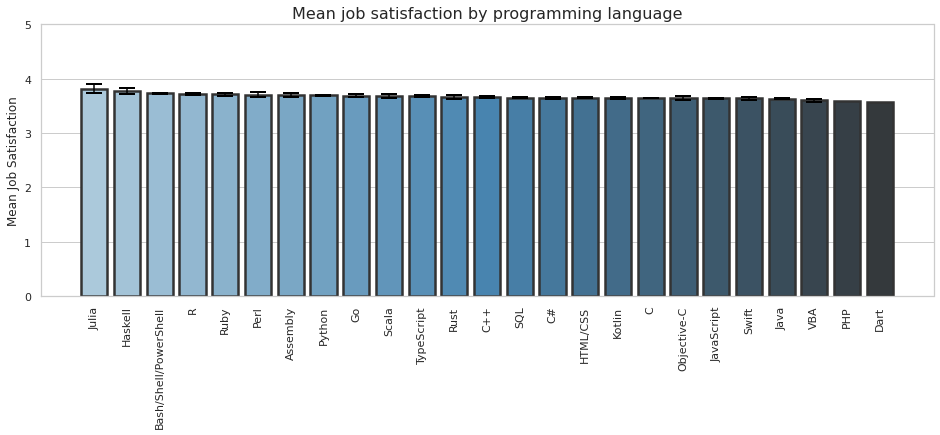

In [27]:
import seaborn as sns
import matplotlib.pylab as plt

ax3 = sns.barplot(x=df_mean_jobsat.head(25).index, y="Mean Job Satisfaction", 
                  data=df_mean_jobsat.head(25), palette="Blues_d",  
                  edgecolor=".2", linewidth=2.5)

sns.set(rc={'figure.figsize':(14,7)})

sns.set_style("whitegrid")

plt.errorbar(x=df_mean_jobsat.index[0:23], 
             y=df_mean_jobsat['Mean Job Satisfaction'][0:23],
             yerr=df_mean_jobsat['std_err'][0:23], capsize=8, capthick=2, ls='none', ecolor='black')

ax3.set(ylim=(0, 5))

ax3.set_title('Mean job satisfaction by programming language', fontsize=16)

ax3.tick_params(axis='x', rotation=90)

Here we can see that the programmng language is more correlated to the salary than to the job satisfaction in the population that was studied